### Example notebook for Keithley 6430 SMU

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

import qcodes as qc
from qcodes_contrib_drivers.drivers.Tektronix.Keithley_6430 import Keithley_6430

In [3]:
qc.Instrument.close_all()
smu = Keithley_6430("SMU", "Keithley6430")

Connected to: KEITHLEY INSTRUMENTS INC. 6430 (serial:1357727, firmware:C28   Jun 13 2011 12:31:43/A02  /G/B) in 0.14s


In [4]:
smu.print_readable_snapshot(update=True)

SMU:
	parameter                        value
--------------------------------------------------------------------------------
IDN                               :	{'vendor': 'KEITHLEY INSTRUMENTS INC.', '...
arm_count                         :	1 
arm_source                        :	IMM 
autozero                          :	True 
digits                            :	6 
filter_auto                       :	True 
filter_median                     :	0 
filter_median_enabled             :	True 
filter_moving                     :	1 
filter_moving_enabled             :	True 
filter_repeat                     :	1 
filter_repeat_enabled             :	True 
nplc                              :	10.00 
output_auto_off                   :	False 
output_on                         :	False 
sense_autorange                   :	True 
sense_current                     :	None 
sense_current_range               :	1.050000E-04 
sense_mode                        :	CURR:DC 
sense_resistance                  :	Non

### Measure resistance of a ~100k$\Omega$ resistor
Source mode can be either `"VOLT"` for voltage,  or `"CURR"` for current.
Sense mode can be any combination of `"VOLT:DC"`, `"CURR:DC"` and `"RES"`, to measure voltage, current and/or resistance.
Source value can be the changed with `"source_voltage"` or `"source_current"`. Values can be measured with `"sense_voltage"`, `"sense_current"`, and `"sense_resistance"`.

<IPython.core.display.Javascript object>


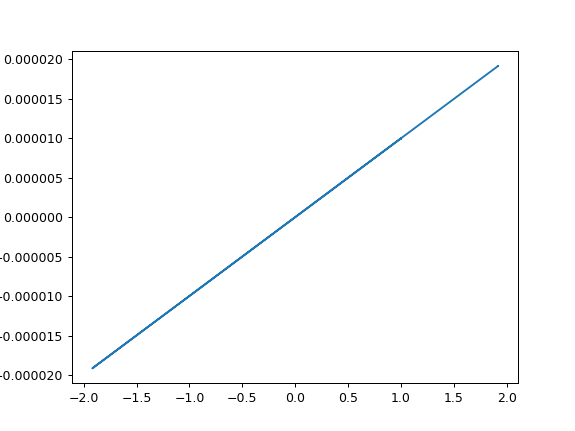

Measured by instrument: 100313.51099999998
Estimate from raw values: 100377.86190725854


In [133]:
smu.sense_mode('CURR:DC,VOLT:DC,RES') # set to measure current, voltage, and resistance
smu.source_mode('VOLT') # set to source voltage
smu.source_voltage_range(2)
smu.source_current_compliance(1e-3)
smu.output_enabled(True)
v, i, r = [], [], []
for volt in np.linspace(-10, 10, 100): # set voltage, measure all 3
    smu.source_voltage(volt)
    v.append(smu.sense_voltage())
    i.append(smu.sense_current())
    r.append(smu.sense_resistance())
    
smu.output_enabled(False)

plt.plot(v,i)
meas_r = np.mean(r)
meas2_r = np.mean( (v[0]-v[-1])/(i[0]-i[-1]) ) # lazy ""fit"" to a line
print("Measured by instrument:", meas_r)
print("Estimate from raw values:", meas2_r)

In [20]:
smu.output_enabled(False)
smu.close()